In [5]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [130]:

def f(w):
    return 418.1829-w*sin(np.sqrt(w))

[418.1829, 417.34142901519215, 416.2073681080145, 415.22182006502896, 414.54571029269727, 414.2491543422639, 414.35395418910923, 414.85249713293075, 415.71832606109564, 416.9128199274612, 418.38973531529587, 420.0984376177262, 421.9862659584154, 424.00029277908, 426.0886425834003, 428.2014794750753, 430.29173992492684, 432.3156660457796, 434.23318058062085, 436.0081350987123, 437.6084559792131, 439.0062077012922, 440.1775891670474, 441.1028758812245, 441.7663185496535, 442.1560068665785, 442.26370582153254, 442.0846706852676, 441.6174458708682, 440.8636520659384, 439.8277653613219, 438.51689153589285, 436.94053817610796, 435.110386898105, 433.04006758725063, 430.74493626570643, 428.24185793516136, 425.54899551320017, 422.68560578275657, 419.6718431005768, 416.52857145910104, 413.2771853637554, 409.93943987187134, 406.5372900382396, 403.09273992386517, 399.6277012473161, 396.16386169080727, 392.7225628147137, 389.324687483556, 385.99055666277934, 382.7398354080979, 379.5914478371184, 37

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


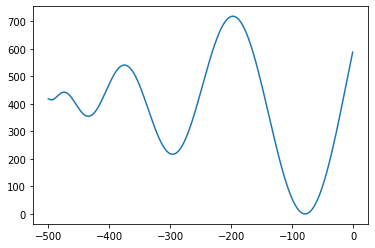

In [131]:
import tensorflow as tf
x = []
y = []
for i in range(-500,500):
  x.append(i)
for i in x:
  y.append(f(x[i]))
print(y)
plt.plot(x,y)
plt.show()

In [132]:
def grad(w):
 return -sin(np.sqrt(w[0]))-1/2*(np.sqrt(w[0]))*cos(np.sqrt(w[0]))

In [133]:
def gd(x, grad, alpha, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1] = x
    return xs

In [134]:
xgrad = gd(np.array([20]), grad, alpha= 0.002, max_iter= 100000)







In [135]:
print(xgrad)

[20.         19.99699331 19.99398539 ...  5.2391993   5.2391993
  5.2391993 ]


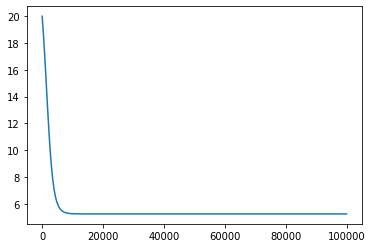

In [136]:
plt.plot(xgrad)

In [137]:
def gd_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros(1 + max_iter)
    xs[0] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1+beta**(i+1))
        x = x - alpha * vc
        xs[i+1] = x
    return xs

In [138]:
xgrad = gd_momentum(np.array([20]), grad, alpha= 0.002, max_iter= 100000)

In [139]:
print(xgrad)

[20.         19.99984175 19.99952613 ...  5.2391993   5.2391993
  5.2391993 ]


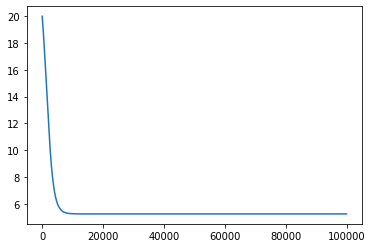

In [140]:
plt.plot(xgrad)

In [141]:
def gd2_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)
        vc = v/(1+beta**(i+1))
        x = x - alpha * vc
        xs[i+1, :] = x
    return xs

In [142]:
xgrad = gd2_momentum(np.array([20]), grad, alpha= 0.002, max_iter= 100000)

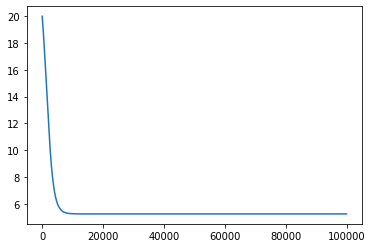

In [143]:
plt.plot(xgrad)

In [144]:
def gd2_rmsprop(x, grad, alpha, beta=0.9, eps=1e-8, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)**2
        x = x - alpha * grad(x) / (eps + np.sqrt(v))
        xs[i+1, :] = x
    return xs

In [145]:
xgrad = gd2_rmsprop(np.array([20]), grad, alpha= 0.005,beta=0.9,eps=1e-8, max_iter= 10)

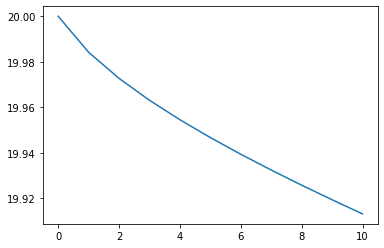

In [146]:
plt.plot(xgrad)

In [147]:
def gd2_adam(x, grad, alpha, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    m = 0
    v = 0
    for i in range(max_iter):
        m = beta1*m + (1-beta1)*grad(x)
        v = beta2*v + (1-beta2)*grad(x)**2
        mc = m/(1+beta1**(i+1))
        vc = v/(1+beta2**(i+1))
        x = x - alpha * m / (eps + np.sqrt(vc))
        xs[i+1, :] = x
    return xs

In [148]:
xgrad = gd2_adam(np.array([20]), grad, alpha= 0.005,beta1=0.9,beta2=0.999,eps=1e-8, max_iter= 10)

In [149]:
print(xgrad)

[[20.        ]
 [19.97764492]
 [19.94760847]
 [19.91262286]
 [19.87416405]
 [19.83318798]
 [19.79036845]
 [19.74620375]
 [19.70107361]
 [19.6552732 ]
 [19.60903511]]


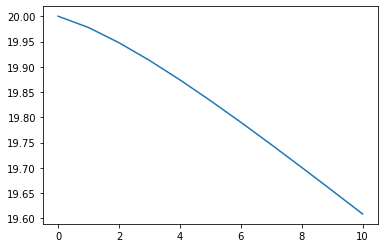

In [150]:
plt.plot(xgrad)